In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv("/content/drive/MyDrive/PRAKTIKUM ML/Praktikum07/Data/dataset_satelit.csv")
print("Data berhasil dimuat!\n")
print(df.head())

Data berhasil dimuat!

   No   Longitude  Lattitude     N     P      K    Ca    Mg      Fe      Mn  \
0   1  103.036658  -0.604417  2.64  0.15  0.415  0.51  0.31  119.96  463.23   
1   2  103.037201  -0.604689  2.75  0.17  0.568  0.76  0.58  102.63  493.81   
2   3  103.036359  -0.603012  1.77  0.12  0.339  0.49   0.6  107.37  460.93   
3   4  103.036950  -0.603219  2.30  0.15  0.460  0.74  0.67   96.02  338.17   
4   5  103.036802  -0.601969  2.05  0.14  0.308  0.64  0.72   87.01  384.33   

   ...      b1  Sigma_VV  Sigma_VH      plia       lia      iafe  gamma0_vv  \
0  ...  0.0433   0.18183   0.04461  35.74446  35.79744  35.41161    0.22331   
1  ...  0.0465   0.22079   0.04640  35.12096  35.14591  35.41510    0.27116   
2  ...  0.0417   0.18926   0.03992  35.07724  35.07730  35.41135    0.23242   
3  ...  0.0367   0.14769   0.03622  36.08078  36.08469  35.41583    0.18138   
4  ...  0.0361   0.18205   0.03797  32.68855  32.69293  35.41592    0.22359   

   gamma0_vh  beta0_vv  bet

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         594 non-null    int64  
 1   Longitude  594 non-null    float64
 2   Lattitude  594 non-null    float64
 3   N          594 non-null    float64
 4   P          594 non-null    float64
 5   K          593 non-null    float64
 6   Ca         594 non-null    float64
 7   Mg         594 non-null    object 
 8   Fe         594 non-null    float64
 9   Mn         594 non-null    float64
 10  Cu         594 non-null    float64
 11  Zn         594 non-null    float64
 12  B          594 non-null    float64
 13  b12        594 non-null    float64
 14  b11        594 non-null    float64
 15  b9         594 non-null    float64
 16  b8a        594 non-null    float64
 17  b8         594 non-null    float64
 18  b7         594 non-null    float64
 19  b6         594 non-null    float64
 20  b5        

In [ ]:
df.describe()

,No,Longitude,Lattitude,N,P,K,Ca,Fe,Mn,Cu,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
count,594.000000,594.000000,594.000000,594.000000,594.000000,593.000000,594.000000,594.000000,594.000000,594.000000,...,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,297.500000,106.878644,-1.024933,2.259091,0.141380,0.582175,0.595094,74.613771,308.034697,2.391195,...,0.177291,0.234474,0.102789,28.640422,28.664891,28.609569,0.202587,0.051524,0.269642,0.062320
std,171.617307,4.949840,0.965349,0.395499,0.019782,0.222567,0.366118,55.579655,241.731643,1.580296,...,0.155615,0.070516,0.112310,15.325347,15.380384,15.329170,0.104357,0.012959,0.143728,0.024218
min,1.000000,102.760857,-2.333750,1.140000,0.090000,0.122000,0.050000,21.080000,3.160000,0.090000,...,0.014100,0.115170,0.021460,0.127000,0.098600,0.026000,0.008700,0.016900,0.009300,0.016300
25%,149.250000,102.927811,-2.233338,1.982500,0.130000,0.429000,0.320000,40.705000,124.015000,1.172500,...,0.046925,0.183210,0.039535,31.959745,31.968948,33.685353,0.183085,0.040250,0.244935,0.052772
50%,297.500000,103.581969,-0.602276,2.280000,0.140000,0.549000,0.540000,65.650000,239.445000,2.225000,...,0.072700,0.213385,0.046550,35.067930,35.110415,34.611565,0.233590,0.050415,0.310380,0.068380
75%,445.750000,113.403797,-0.257349,2.570000,0.150000,0.710000,0.790000,87.372500,434.990000,3.357500,...,0.318900,0.262242,0.059190,38.319135,38.441065,39.002760,0.271790,0.060410,0.364505,0.079020
max,594.000000,113.434700,0.069251,3.230000,0.220000,1.489000,2.820000,559.100000,2009.320000,8.170000,...,0.751400,0.512210,0.373000,47.592900,48.014640,39.209330,0.658960,0.122300,0.814170,0.150620


In [ ]:
df.columns

Index(['No', 'Longitude', 'Lattitude', 'N', 'P', 'K', 'Ca', 'Mg', 'Fe', 'Mn',
       'Cu', 'Zn', 'B', 'b12', 'b11', 'b9', 'b8a', 'b8', 'b7', 'b6', 'b5',
       'b4', 'b3', 'b2', 'b1', 'Sigma_VV', 'Sigma_VH', 'plia', 'lia', 'iafe',
       'gamma0_vv', 'gamma0_vh', 'beta0_vv', 'beta0_vh'],
      dtype='object')

In [ ]:
df["N"].unique()

array([2.64, 2.75, 1.77, 2.3 , 2.05, 2.2 , 1.95, 2.35, 2.34, 2.72, 2.59,
       2.63, 2.83, 2.41, 2.26, 2.42, 1.96, 2.31, 2.39, 2.22, 2.27, 2.84,
       2.52, 2.81, 2.47, 2.36, 2.95, 2.69, 2.51, 2.12, 2.46, 2.55, 2.09,
       2.07, 2.13, 2.02, 2.57, 2.49, 2.4 , 2.15, 2.25, 2.06, 1.89, 2.29,
       2.28, 2.11, 1.9 , 2.5 , 2.19, 2.03, 2.1 , 2.01, 2.23, 1.91, 2.45,
       2.87, 2.7 , 3.02, 2.43, 2.74, 2.16, 1.8 , 2.24, 2.6 , 2.37, 2.21,
       2.04, 2.53, 2.71, 1.78, 2.67, 2.61, 2.56, 2.14, 2.32, 2.77, 2.79,
       2.17, 3.13, 2.62, 3.12, 2.44, 2.89, 2.  , 1.85, 1.98, 2.48, 1.87,
       2.86, 2.73, 2.68, 2.38, 1.71, 2.18, 2.66, 2.9 , 2.54, 2.82, 1.94,
       1.92, 1.79, 1.52, 1.99, 1.5 , 1.76, 1.72, 1.56, 1.73, 1.41, 1.83,
       1.39, 1.53, 1.66, 1.61, 1.7 , 1.57, 1.47, 1.67, 1.35, 1.82, 1.43,
       1.68, 1.69, 1.3 , 1.49, 1.75, 1.6 , 2.08, 1.88, 1.97, 1.84, 1.81,
       1.93, 1.58, 1.37, 1.44, 1.86, 1.48, 1.29, 1.45, 1.34, 1.54, 1.55,
       1.63, 1.14, 1.28, 1.42, 1.74, 2.58, 2.33, 2.

In [ ]:
X = df[['b1', 'Sigma_VV', 'Sigma_VH', 'plia', 'lia', 'iafe',
       'gamma0_vv', 'gamma0_vh', 'beta0_vv', 'beta0_vh']]

y = df['N']

In [ ]:
X.head()

,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
0,0.0433,0.18183,0.04461,35.74446,35.79744,35.41161,0.22331,0.05479,0.31325,0.07686
1,0.0465,0.22079,0.04640,35.12096,35.14591,35.41510,0.27116,0.05699,0.38033,0.07993
2,0.0417,0.18926,0.03992,35.07724,35.07730,35.41135,0.23242,0.04902,0.32604,0.06876
3,0.0367,0.14769,0.03622,36.08078,36.08469,35.41583,0.18138,0.04448,0.25440,0.06238
4,0.0361,0.18205,0.03797,32.68855,32.69293,35.41592,0.22359,0.04664,0.31359,0.06541


In [ ]:
y.head()

,N
0,2.64
1,2.75
2,1.77
3,2.30
4,2.05


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Hasil Evaluasi Model SVR:")
print(f"MAE  : {mae:.3f}")
print(f"MSE  : {mse:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"R²   : {r2:.3f}")


Hasil Evaluasi Model SVR:
MAE  : 0.228
MSE  : 0.081
RMSE : 0.285
R²   : 0.464


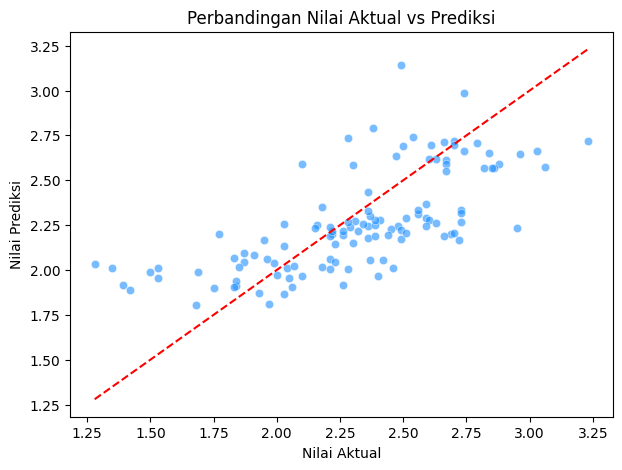

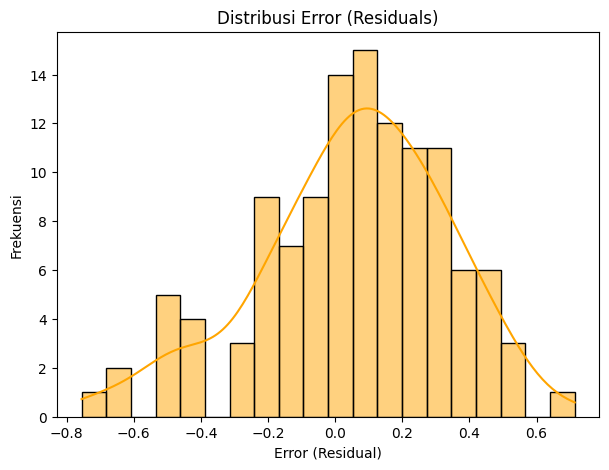

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred, color="dodgerblue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Nilai Aktual")
plt.ylabel("Nilai Prediksi")
plt.title("Perbandingan Nilai Aktual vs Prediksi")
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(7, 5))
sns.histplot(residuals, bins=20, kde=True, color="orange")
plt.xlabel("Error (Residual)")
plt.ylabel("Frekuensi")
plt.title("Distribusi Error (Residuals)")
plt.show()